# Analiza wrażliwości

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from simulation import run_simulation

%matplotlib inline

In [48]:
n_simulations = 1000

## Ile klenerów zatrudnić

In [23]:
max_male = 10
max_female = 10

male_bartenders = np.arange(0, max_male+1)
female_bartenders = np.arange(0, max_female+1)
bartender_results = np.zeros((max_male+1, max_female+1))

for i in range(bartender_results.shape[0]):
    for j in range(bartender_results.shape[1]):
        # creating unique combination of male and female bartenders
        barternders = [False] * male_bartenders[i] + [True] * female_bartenders[j]
        #running simulation
        results, _ = run_simulation(n_simulations=n_simulations, bartenders=barternders)
        
        #appending results
        bartender_results[i, j] = results.mean()

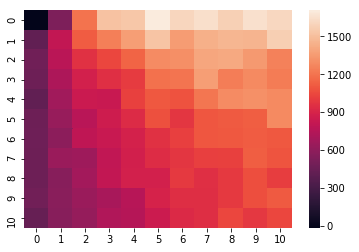

In [35]:
ax = sns.heatmap(bartender_results)
plt.show()

## Jaka strategia cenowa

In [41]:
results_expensive, _ = run_simulation(n_simulations=n_simulations, drink_price=4, patience_threshold=10)
results_cheap, _ = run_simulation(n_simulations=n_simulations)
results_super_cheap, _ = run_simulation(
    n_simulations=n_simulations,
    drink_price=1,
    patience_threshold=20,
    customer_lambda=10)

In [44]:
print("średnia:")
print("droższe drinki: " + str(results_expensive.mean()))
print("tańsze drinki: " + str(results_cheap.mean()))
print("super tanie drinki: " + str(results_super_cheap.mean()))

print("\nodchylenie:")
print("droższe drinki: " + str(results_expensive.std()))
print("tańsze drinki: " + str(results_cheap.std()))
print("super tanie drinki: " + str(results_super_cheap.std()))

średnia:
droższe drinki: 1300.9178652531587
tańsze drinki: 818.3555038197655
super tanie drinki: 743.5231906176626

odchylenie:
droższe drinki: 446.13103980807307
tańsze drinki: 304.8251123372854
super tanie drinki: 325.44451323692346


<Figure size 1440x720 with 0 Axes>

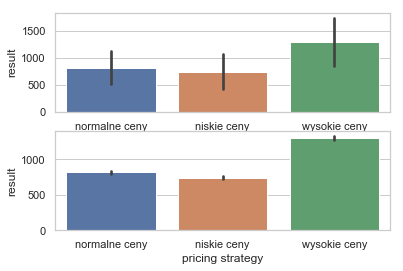

In [73]:
plt.figure(figsize=(20,10))
f, axes = plt.subplots(2, 1)
sns.set(style="whitegrid")
df_to_plot = pd.DataFrame(
    {
        "pricing strategy": 
            ["normalne ceny"] * n_simulations + 
            ["niskie ceny"] * n_simulations + 
            ["wysokie ceny"] * n_simulations,
        "result": np.concatenate((results_cheap, results_super_cheap, results_expensive), axis=0)
    }
)
ax = sns.barplot(x="pricing strategy", y="result", data=df_to_plot, ci="sd", ax=axes[0]) # standard diviation
ax = sns.barplot(x="pricing strategy", y="result", data=df_to_plot, ci=95, ax=axes[1]) # some bootstrap :D

## Zatrudnianie ładniejszych kelnerek